<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/ml_tutor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to machine learning

Working examples are presented to introduce Machnine Learning tasks.


##Predicting wine quality from parameters

We use public white wine quality dataset to introduce supervised machine learning solutions. Let's download the data first!

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2023-12-20 22:21:25--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [   <=>              ] 258.23K   423KB/s    in 0.6s    

2023-12-20 22:21:27 (423 KB/s) - ‘winequality-white.csv’ saved [264426]



There are eleven parameters and a quality column in the downloaded csv file. The first few lines are the following (the column headers are in the first line):

In [2]:
!head winequality-white.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6


We will use different supervised ML methods to build a model to predict quality (3-9) from these parameters.

###Multiple regression

Supposing there are linear connections between the parameters and the quality we fit a hyper-plane on the data set.

First we read data using **pandas**.

In [3]:
import pandas
df = pandas.read_csv("winequality-white.csv", sep=';')
print(f"Number of records in the data set: {len(df.index)}")
df.head()

Number of records in the data set: 4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Let's sperate training and test data sets. 25% of records will be used for **testing** the model.

In [4]:
features = list(df.columns)[:-1]
X = df[features]
y = df[df.columns[-1]]

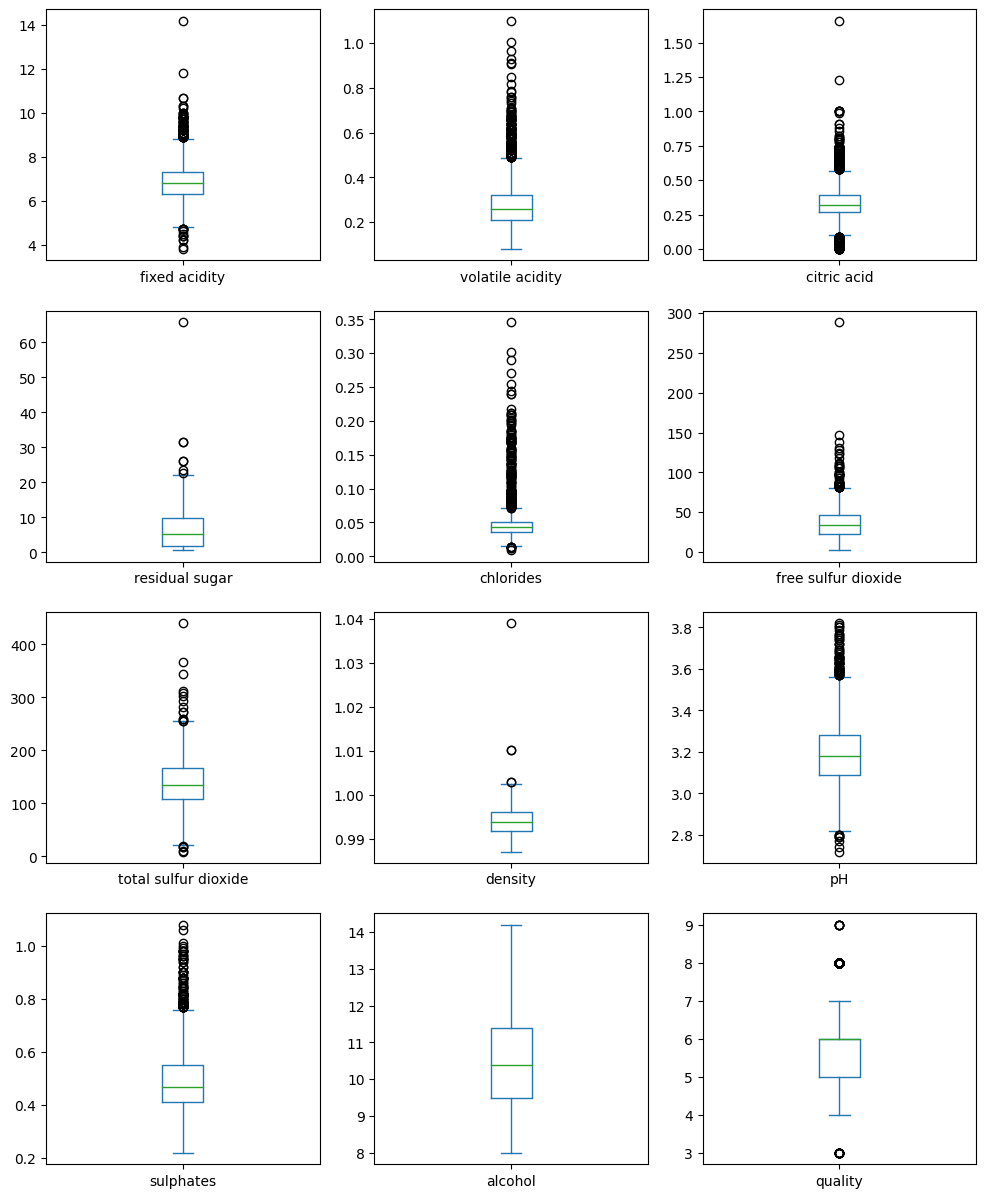

In [10]:
_ = df.plot(kind='box', subplots=True, layout=(4, 3), figsize=(12, 15), sharex=False, sharey=False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) #, random_state = 22)

Let's visualize the distribution of different quality values in the train and test set.

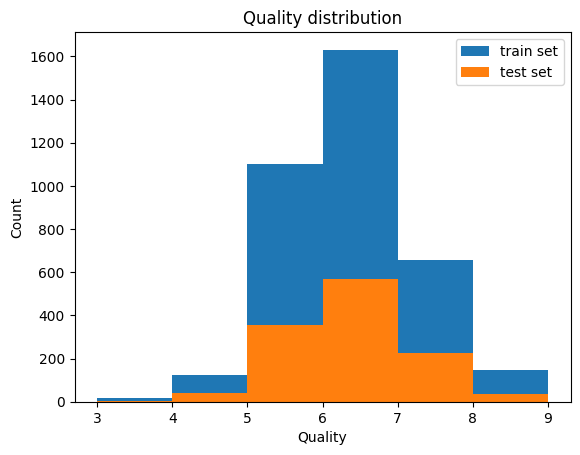

In [ ]:
from matplotlib import pyplot as plt
plt.hist(y_train, label='train set', bins=range(3, 10))
plt.hist(y_test, label='test set', bins=range(3,10))
plt.legend()
plt.xlabel('Quality')
plt.ylabel('Count')
_ = plt.title('Quality distribution')

The quality distribution of the training and the test sets are similar.

Let's create our first linear model.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
_ = regr.fit(X_train, y_train)

Calculating some statistical data using the model on the test set. Let's display also the distribution of differences.

mean difference: -0.0; mean error: 0.8; min diff -3.0; max diff 5.0
53.1% fits perfect
95.2% fit close (less then 2 class difference)
difference range: (-3, 5)


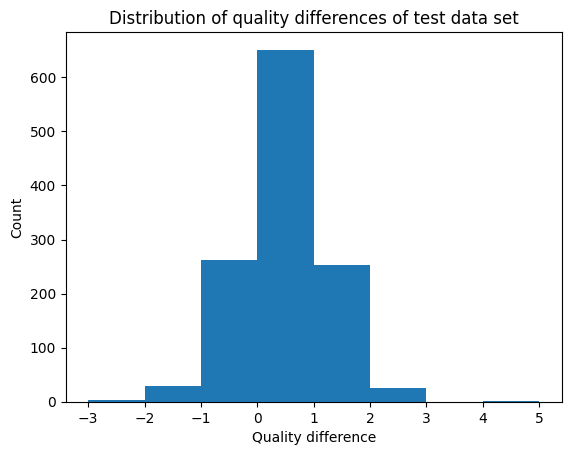

In [ ]:
# testing the model
predicted = (regr.predict(X_test)+0.5).astype(int)
diff = y_test - predicted           # differences between estimated and ground truth values
print(f"mean difference: {diff.mean():.1f}; mean error: {diff.std():.1f}; min diff {diff.min():.1f}; max diff {diff.max():.1f}")
print(f"{diff[diff == 0].shape[0] / diff.shape[0] * 100:.1f}% fits perfect")
print(f"{(diff[abs(diff) < 2].shape[0] / diff.shape[0])*100:.1f}% fit close (less then 2 class difference)")
print(f"difference range: {(diff.min(), diff.max())}")
plt.hist(diff, bins=range(diff.min(), diff.max()+1, 1))
plt.xlabel('Quality difference')
plt.ylabel('Count')
_ = plt.title('Distribution of quality differences of test data set')

Is the linear approximation correct? Let's display the quality as a function of the individual parameters.

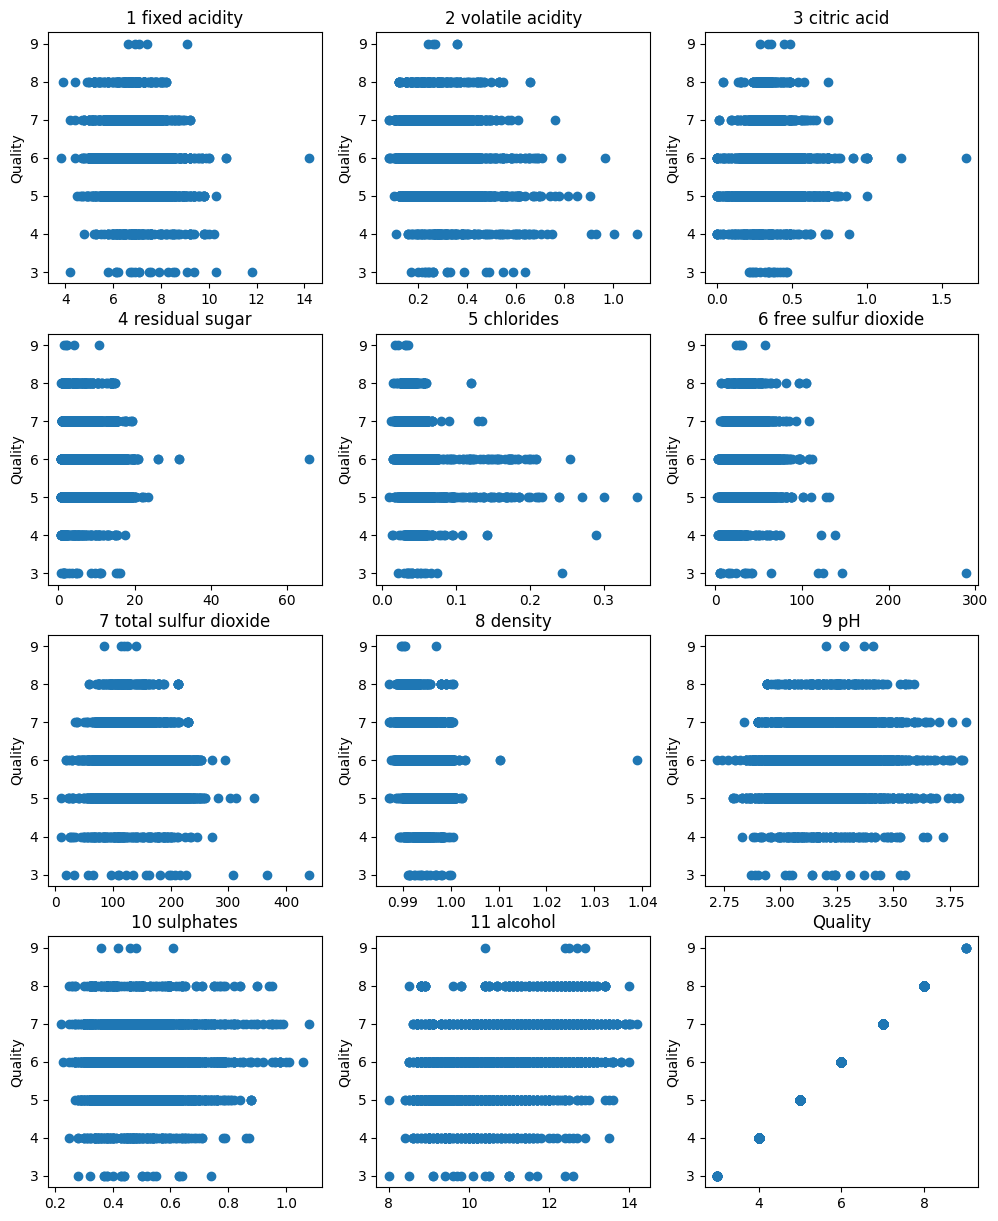

In [ ]:
_, ax = plt.subplots(4, 3, figsize=(12, 15))
for n, col_name in enumerate(X.columns):
    i, j = n // 3, n % 3
    ax[i, j].scatter(X[col_name], y)
    ax[i, j].set_title(str(n+1)+" "+col_name)
    ax[i, j].set_ylabel('Quality')
ax[-1,-1].scatter(y, y)
ax[-1, -1].set_title("Quality")
_ = ax[-1, -1].set_ylabel("Quality")

From the charts above we can see, there are now linear relations among parameters and the quality.

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = (regr.predict(X_train)+0.5).astype(int))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = predicted)*100:.1f}%")

Train data accuracy: 51.5%
Test  data accuracy: 53.1%


The 50 percent match on the training data set is not satisfactory.

##Logistic regression

Logistic regression is a classification algorithm. It can solve binary and multi class problems.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression(max_iter = 10000, C=10, solver='newton-cholesky')
logit.fit(X_train, y_train)
print(f"Train data accuracy: {logit.score(X_train, y_train)*100:.1f}%")
print(f"Test  data accuracy: {logit.score(X_test, y_test)*100:.1f}%")
print(f"Classes: {logit.classes_}")

Train data accuracy: 53.6%
Test  data accuracy: 54.6%
Classes: [3 4 5 6 7 8 9]


The accuracy of this model is a bit higher than the linear one, but it is not promissing yet.

In [ ]:
log_pred = logit.predict(X_test)
diff = y_test - log_pred
print(f"mean difference: {diff.mean():.1f} mean error: {diff.std():.1f} min diff {diff.min():.1f} max diff {diff.max():.1f}")

mean difference: 0.1 mean error: 0.8 min diff -4.0 max diff 2.0


In [ ]:
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = logit.predict(X_train))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = log_pred)*100:.1f}%")
print(f"{(diff[abs(diff) < 2].shape[0] / diff.shape[0])*100:.1f}% fit close (less then 2 class difference)")

Train data accuracy: 53.6%
Test  data accuracy: 54.6%
94.9% fit close (less then 2 class difference)


Confusion matrix

In [ ]:
from sklearn import metrics
cm_test = metrics.confusion_matrix(y_test, log_pred)
print("Confusion matrix of test data set")
print(cm_test)
cm_train = metrics.confusion_matrix(y_train, logit.predict(X_train))
print("\nConfusion matrix of train data set")
print(cm_train)

Confusion matrix of test data set
[[  0   0   0   3   1   0   0]
 [  0   0  20  20   0   0   0]
 [  0   0 183 171   0   0   0]
 [  0   1  93 456  15   1   1]
 [  0   0   6 189  30   0   0]
 [  0   0   0  29   6   0   0]
 [  0   0   0   0   0   0   0]]

Confusion matrix of train data set
[[   2    0    8    6    0    0    0]
 [   0    2   76   42    3    0    0]
 [   0    0  594  505    4    0    0]
 [   0    0  309 1285   37    0    0]
 [   0    0   28  541   86    0    0]
 [   0    0    2  114   24    0    0]
 [   0    0    0    3    2    0    0]]


##Decision trees

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [ ]:
tree_pred = dtree.predict(X_test)
diff = y_test - tree_pred
print(f"mean difference: {diff.mean():.1f} mean error: {diff.std():.1f} min diff {diff.min():.1f} max diff {diff.max():.1f}")

In [ ]:
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = tree_pred)*100:.1f}%")

Train data accuracy: 100.0%
Test  data accuracy: 58.9%


In [ ]:
cm_test = metrics.confusion_matrix(y_test, tree_pred)
print("Confusion matrix of test data set")
print(cm_test)

Confusion matrix of test data set
[[  0   0   0   4   0   0   0]
 [  1   4  19  15   1   0   0]
 [  2  16 216  95  23   2   0]
 [  1  11 108 358  80   8   1]
 [  0   1  16  69 130   9   0]
 [  0   0   1   9  11  14   0]
 [  0   0   0   0   0   0   0]]


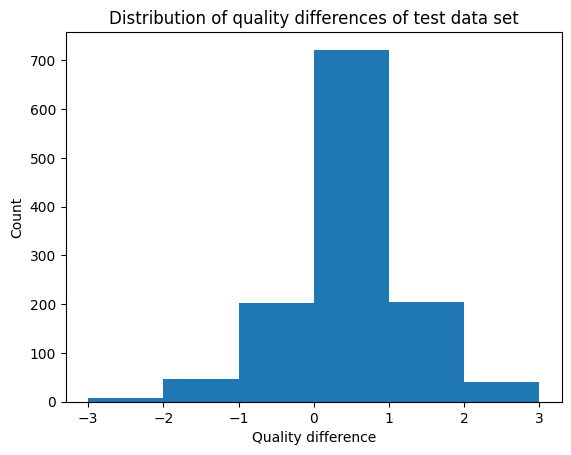

In [ ]:
plt.hist(diff, bins=range(diff.min(), diff.max()+1, 1))
plt.xlabel('Quality difference')
plt.ylabel('Count')
_ = plt.title('Distribution of quality differences of test data set')

Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rftree = RandomForestClassifier()
rftree = rftree.fit(X_train, y_train)
rftree_pred = dtree.predict(X_test)
diff = y_test - rftree_pred
print(f"mean difference: {diff.mean():.1f} mean error: {diff.std():.1f} min diff {diff.min():.1f} max diff {diff.max():.1f}")

mean difference: -0.0 mean error: 0.8 min diff -3.0 max diff 3.0


In [ ]:
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = tree_pred)*100:.1f}%")

Train data accuracy: 100.0%
Test  data accuracy: 60.2%


Both tree classifier gave similar results, which show overfitting on training data.

##Neural network

Number of neurons:

$N_h = \frac {N_s} {\alpha \cdot (N_i + N_o)}$

$N_s$ - number of input samples in train data set

$\alpha$ - scaling factor between 2 and 10

$N_i$ - number of input neurons

$N_o$ - number of output neurons

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-2, max_iter=10000,
                    hidden_layer_sizes=(40, 40), random_state=1)

In [ ]:
clf.fit(X_train, y_train)
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = clf.predict(X_train))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = clf.predict(X_test))*100:.1f}%")

Train data accuracy: 56.3%
Test  data accuracy: 55.4%


Scaling the data

The different magnitude of the parameters can be handled better if parameters are scaled by removing mean and scaling to unit variance.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(),
                     MLPClassifier(solver='lbfgs', alpha=1e-2, max_iter=10000, hidden_layer_sizes=(40, 40))) #, random_state=1))
pipe.fit(X_train, y_train)
print(f"Train data accuracy: {pipe.score(X_train, y_train)*100:.1f}%")
print(f"Test  data accuracy: {pipe.score(X_test, y_test)*100:.1f}%")

Train data accuracy: 100.0%
Test  data accuracy: 58.9%


In [ ]:
cm_test = metrics.confusion_matrix(y_test, pipe.predict(X_test))
print("Confusion matrix of test data set")
print(cm_test)
cm_train = metrics.confusion_matrix(y_train, pipe.predict(X_train))
print("\nConfusion matrix of train data set")
print(cm_train)

Confusion matrix of test data set
[[  0   0   3   0   1   0   0]
 [  0   6  15  13   4   1   1]
 [  0  17 228  97   9   3   0]
 [  2  13 113 361  66  11   1]
 [  0   4  25  71 110  15   0]
 [  0   0   2   8   8  17   0]
 [  0   0   0   0   0   0   0]]

Confusion matrix of train data set
[[  16    0    0    0    0    0    0]
 [   0  123    0    0    0    0    0]
 [   0    0 1103    0    0    0    0]
 [   0    0    0 1631    0    0    0]
 [   0    0    0    0  655    0    0]
 [   0    0    0    0    0  140    0]
 [   0    0    0    0    0    0    5]]
